In [1]:
import random
import math
import operator
import itertools


def outer_frame_vertical(required_length, waste_wood_database):
    #pick piece of wood from database for vertical outer frame (left & right) 
    chosen_beam = next(beam for beam in waste_wood_database if beam.length >= required_length)
    
    #determine additional waste with picked piece of wood
    waste = chosen_beam.length - required_length
    waste_wood_database.remove(chosen_beam)
    structural_infill_waste.append(waste)
    structural_infill_used.append(chosen_beam.length)
    
    
def outer_frame_horizontal(required_length, waste_wood_database):
    #pick piece of wood from database for horizontal outerframe (top & bottom) 
    chosen_beam = next(beam for beam in waste_wood_database if beam.length >= required_length)
    
    #determine additional waste with picked piece of wood
    waste = chosen_beam.length - required_length
    waste_wood_database.remove(chosen_beam)
    structural_infill_waste.append(waste)
    structural_infill_used.append(chosen_beam.length)
    

def bracing (height_segment, width_segment, waste_wood_database):
    #determine dimensions right triangle for pythagoras calculation
    bracing_width = width_segment  
    bracing_height = height_segment
    bracing_length = round((bracing_width**2 + bracing_height**2)**0.5)
    
    #pick piece of waste wood from database for bracing
    chosen_beam = next(beam for beam in waste_wood_database if beam.length >= bracing_length)
    waste = chosen_beam.length - bracing_length
    waste_wood_database.remove(chosen_beam)
    structural_infill_waste.append(waste)
    structural_infill_used.append(chosen_beam.length)
    
    
def intersection_formula (x_position, height_segment, width_segment):
    #determine the formula of the bracing so the length of the bottom and top stud can be termined on every position along the slope
    a = height_segment / width_segment
    b = height_segment 
    y = -a * x_position + b 
    length_bottom_stud = round(y) 
    return length_bottom_stud
    
def select_studs (chosen_bottom_stud, bottom_stud_length, chosen_top_stud, top_stud_length, waste_wood_database, stud_position):
    #determine waste bottom stud & remove bottom studs from database
    waste = chosen_bottom_stud.length - bottom_stud_length
    waste_wood_database.remove(chosen_bottom_stud)
    structural_infill_waste.append(waste)
    structural_infill_used.append(chosen_bottom_stud.length)
    
    
    #determine waste top stud & remove top studs from database
    waste = chosen_top_stud.length - top_stud_length
    waste_wood_database.remove(chosen_top_stud)
    structural_infill_waste.append(waste)
    structural_infill_used.append(chosen_top_stud.length)

def segment(width_segment, height_segment, ctc_distance, waste_wood_database):

 
    bracing(height_segment, width_segment, waste_wood_database)

    stud_position = ctc_distance
    
    while stud_position < width_segment:
        #determine required length for bottom & top stud
        bottom_stud_length = intersection_formula (stud_position, height_segment, width_segment)
        top_stud_length = height_segment - bottom_stud_length 
        margin = 0 
        controle = False

        while controle == False:
            suitable_bottom_studs = iter([beam for beam in waste_wood_database if beam.length >= bottom_stud_length + margin])
            chosen_bottom_stud = next(suitable_bottom_studs) 

            #restrictions top studs based on bottom stud, top stud cannot be wider or deeper then bottom stud
            suitable_top_studs = iter([beam for beam in waste_wood_database if beam.length >= top_stud_length 
            #and beam.width <= chosen_bottom_stud.width
            #and beam.depth <= chosen_bottom_stud.depth 
            #and beam.length < top_stud_length + 150
            and beam.id != chosen_bottom_stud.id
            ])

            chosen_top_stud = next(suitable_top_studs, 0)

            #if no top stud is suitable, a different bottom stud is selected
            if chosen_top_stud == 0:
                margin +=1

            else: 
                controle = True
                select_studs (chosen_bottom_stud, bottom_stud_length, chosen_top_stud, top_stud_length, waste_wood_database, stud_position)
                stud_position = stud_position + ctc_distance


def calculate(ratio, ctc_distance, waste_wood_database, height_wall):

    width_wall = 4800
 
    segment_width = ratio[0] * ctc_distance
    segment(segment_width, height_wall, ctc_distance, waste_wood_database)
    
    segment_width = ratio[1] * ctc_distance
    segment(segment_width, height_wall, ctc_distance, waste_wood_database)
    
def database(database_amount):
    db_id = 0 
    for i in range(0,database_amount):
        length = random.randrange(10, 5000+1, 10)
        width = random.randrange(60, 90+1, 10)
        depth = random.randrange(160, 200+1, 10)
        db_id += 1 
        piece_of_wood = beams(length, width, depth, db_id)
        waste_wood_database.append(piece_of_wood)
        waste_wood_database_2.append(piece_of_wood)
        
    waste_wood_database.sort(key = operator.attrgetter('length'))
    waste_wood_database_2.sort(key = operator.attrgetter('length'))



In [6]:
class beams():
    def __init__(self, length, width, depth, db_id):
        self.length = length
        self.width = width
        self.depth = depth
        self.id = db_id

waste_offset = [] 
waste_even = [] 
size_database = [] 
database_amount = 100
length_sym = []
length_asym = [] 

        
while database_amount < 1000:        
        

    waste_wood_database = []
    waste_wood_database_2 = []


    ratio_1 = [3,5]
    ratio_2 = [4,4]


    offset_ratio_used = [] 
    offset_ratio_waste = [] 
    even_ratio_used = [] 
    even_ratio_waste = [] 

    for i in range(100):

        database(database_amount)

        structural_infill_waste = []
        structural_infill_used = [] 

        calculate(ratio_1, 600, waste_wood_database, 2500)

        offset_ratio_used.append(sum(structural_infill_used)) 
        offset_ratio_waste.append(sum(structural_infill_waste))


        structural_infill_waste = []
        structural_infill_used = []

        calculate(ratio_2, 600, waste_wood_database_2, 2500)

        even_ratio_used.append(sum(structural_infill_used)) 
        even_ratio_waste.append(sum(structural_infill_waste))


        waste_wood_database = []
        waste_wood_database_2 = []

    waste_offset.append(sum(offset_ratio_waste) / len(offset_ratio_waste))
    waste_even.append(sum(even_ratio_waste) / len(even_ratio_waste))
    size_database.append(database_amount) 
    
    database_amount += 100

required_even = sum(even_ratio_used) / len(even_ratio_used) - sum(even_ratio_waste) / len(even_ratio_waste)
required_off = sum(offset_ratio_used) / len(offset_ratio_used) - sum(offset_ratio_waste) / len(offset_ratio_waste)

print(required_even)
print(required_off)


21932.0
21986.0


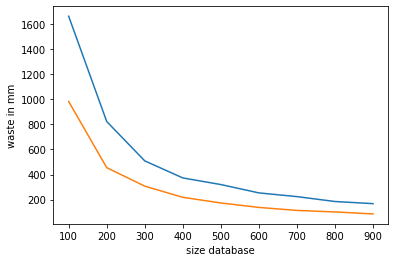

In [7]:
import matplotlib.pyplot as plt
plt.plot(size_database, waste_even)
plt.plot(size_database, waste_offset)
plt.ylabel('waste in mm')
plt.xlabel('size database')
plt.show()